In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

AQMS = ["FIFO", "FIFO (ECN)", "CoDel", "FQ", "FQ-CoDel", "DualPI2"]
DDPS = [0.5, 1, 2, 4, 8]

In [6]:
def load(file):
    with open(file, "r") as f:
        data = json.load(f)
    return data["end"]["sum_received"]["bits_per_second"]


def load_cca(type, cca):
    data = np.empty([len(AQMS), len(DDPS), 10], dtype=np.float64)
    for aqm_i, aqm in enumerate(AQMS):
        for ddp_i, ddp in enumerate(DDPS):
            for i in range(10):
                data[aqm_i, ddp_i, i] = load(
                    f"Results/{type}/{aqm}-N{ddp}/{cca}-results-{i}.json"
                )

    data /= 1_000_000  # convert to Mbit
    data = np.mean(data, axis=2)
    data = np.round(data, decimals=1)
    return data


prague_patched_mbps = load_cca("Patched", "prague")
prague_unpatched_mbps = load_cca("Unpatched", "prague")

In [7]:
def plot_heatmap(data, file, title):
    fig, ax = plt.subplots()
    img = ax.imshow(data, cmap=plt.cm.coolwarm, vmin=0, vmax=100)
    ax.set_xticks(range(len(DDPS)), labels=DDPS)
    ax.set_yticks(range(len(AQMS)), labels=AQMS)

    for y, row in enumerate(data):
        for x, val in enumerate(row):
            ax.text(x, y, val, va="center", ha="center")

    ax.set_title(title)
    ax.set_xlabel("Buffer Size (DDP)")

    fig.colorbar(img)

    plt.savefig(file)

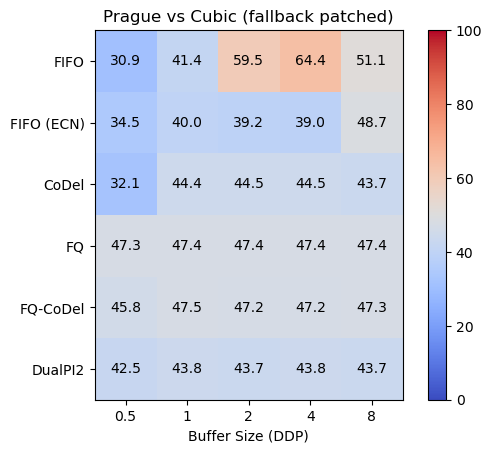

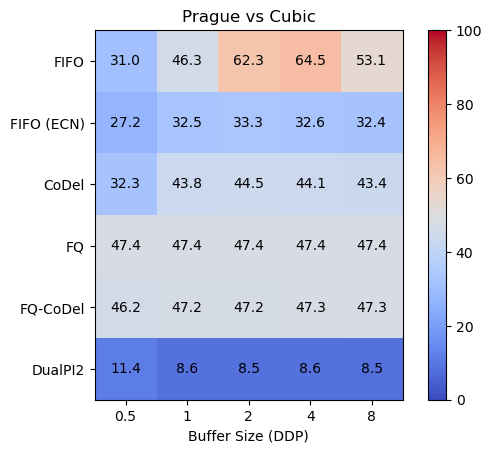

In [8]:
plot_heatmap(prague_patched_mbps, "heatmap-patched.svg", "Prague vs Cubic (fallback patched)")
plot_heatmap(prague_unpatched_mbps, "heatmap-unpatched.svg", "Prague vs Cubic")